# Use Random Forest to prepare a model on fraud data 
- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing

In [2]:
data= pd.read_csv("/content/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# Preprocessing the data
encoder = preprocessing.LabelEncoder()

In [5]:
data["Undergrad"] = encoder.fit_transform(data["Undergrad"])
data["Marital.Status"] = encoder.fit_transform(data["Marital.Status"])
data["Urban"] = encoder.fit_transform(data["Urban"])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [6]:
#Correlation
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
# rename Taxable.Income column
data.rename(columns={"Taxable.Income":"tax_income"},inplace=True)
data

,Undergrad,Marital.Status,tax_income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
# Lets convert our Target variable in oder which is Taxable incom
#those who have taxable_income <= 30000 as "Risky" and others are "Good"
data['tax_income'] = data['tax_income'].apply(lambda tax_income: 'Risky' if tax_income <= 30000 else 'Good')

In [10]:
data

,Undergrad,Marital.Status,tax_income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [11]:
data["tax_income"].value_counts()

Good     476
Risky    124
Name: tax_income, dtype: int64

In [12]:
data["tax_income"] = encoder.fit_transform(data["tax_income"])
data.head()

,Undergrad,Marital.Status,tax_income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [13]:
data["tax_income"].value_counts()

0    476
1    124
Name: tax_income, dtype: int64

# Splitting Train_Test_Data 

In [14]:
x=data[["Undergrad", "Marital.Status", "City.Population", "Work.Experience", "Urban"]]
y=data["tax_income"]
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_income, Length: 600, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


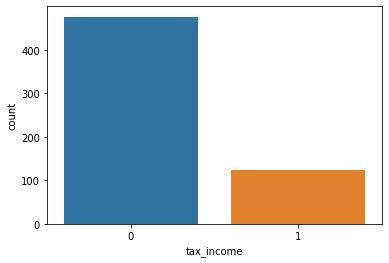

In [16]:
sns.countplot(y)

**0  which is "Good" it has higher count**

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [18]:
y_train.value_counts()

0    384
1     96
Name: tax_income, dtype: int64

In [19]:
y_test.value_counts()

0    92
1    28
Name: tax_income, dtype: int64

>We have splitted the data

# Building the Model as RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=100, max_features=4)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [21]:
#predicting on test data
predct = model.predict(x_test)
pd.Series(predct).value_counts()#getting the count of each category

0    112
1      8
dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predct)

array([[85,  7],
       [27,  1]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


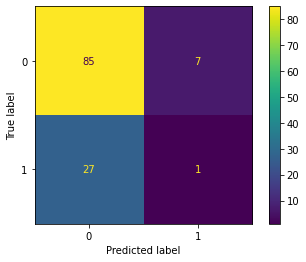

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
plt.show()

> 

In [24]:
count_misclassified =(y_test != predct).sum()
count_misclassified

34

In [25]:
np.mean(predct==y_test)

0.7166666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predct,y_test))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       112
           1       0.04      0.12      0.06         8

    accuracy                           0.72       120
   macro avg       0.48      0.44      0.44       120
weighted avg       0.86      0.72      0.78       120



# Now Building RandomForestClassifier with KFold

In [26]:
kfold = KFold(n_splits=10, random_state=None,shuffle = True)
model = RandomForestClassifier(n_estimators=100, max_features=4)
results = cross_val_score(model, x,y, cv=kfold)
print(results)

[0.85       0.75       0.68333333 0.7        0.7        0.68333333
 0.8        0.8        0.76666667 0.68333333]


In [27]:
results.mean()

0.7416666666666667

In [29]:
results.std()

0.05737304826019503